# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [ ]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* https://www.dropbox.com/s/0kjw2aw211tyohb/GeneralMidi.wav

In [ ]:
!wget https://www.dropbox.com/s/0kjw2aw211tyohb/GeneralMidi.wav

--2022-04-13 05:13:20--  https://www.dropbox.com/s/0kjw2aw211tyohb/GeneralMidi.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0kjw2aw211tyohb/GeneralMidi.wav [following]
--2022-04-13 05:13:20--  https://www.dropbox.com/s/raw/0kjw2aw211tyohb/GeneralMidi.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5d77cf74802c7ae7f0e77ae377.dl.dropboxusercontent.com/cd/0/inline/BjQDGAgs7fmbduQq5ELtnOGwPDs_kR3_q7KjTyXFJUgxFqTQB25gZtx_z9DTpYq6Z7OTDiGMJ4qvIFle9-DnIYI5FJYhmYYRsnve4QhEInHfdF-q69ndjTZIGlr-R7QycZIpGltus9Epxa3NRPReN7WMu0lEyel60ewW24DpbRSKGg/file# [following]
--2022-04-13 05:13:21--  https://uc5d77cf74802c7ae7f0e77ae377.dl.dropboxusercontent.com/cd/0/inline/BjQDGAgs7fmbduQq5ELtnOGwPDs_kR3_q7KjTyXFJUgxFqTQB25gZtx_

In [ ]:
midi_file = './GeneralMidi.wav'

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

In [ ]:
instruments = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
num_notes = 50
sec = 2

audio = []
inst = []
for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)):
  instrument = instruments[inst_idx]
  offset = (instrument * num_notes * sec) + (note * sec)
  print(f"instrument : {instrument}, note :{note}, offset : {offset}")
  y, sr = librosa.load(midi_file, sr = None,  offset = offset, duration = 2.0)
  audio.append(y)
  inst.append(inst_idx)
                                             

instrument : 0, note :0, offset : 0
instrument : 0, note :1, offset : 2
instrument : 0, note :2, offset : 4
instrument : 0, note :3, offset : 6
instrument : 0, note :4, offset : 8
instrument : 0, note :5, offset : 10
instrument : 0, note :6, offset : 12
instrument : 0, note :7, offset : 14
instrument : 0, note :8, offset : 16
instrument : 0, note :9, offset : 18
instrument : 0, note :10, offset : 20
instrument : 0, note :11, offset : 22
instrument : 0, note :12, offset : 24
instrument : 0, note :13, offset : 26
instrument : 0, note :14, offset : 28
instrument : 0, note :15, offset : 30
instrument : 0, note :16, offset : 32
instrument : 0, note :17, offset : 34
instrument : 0, note :18, offset : 36
instrument : 0, note :19, offset : 38
instrument : 0, note :20, offset : 40
instrument : 0, note :21, offset : 42
instrument : 0, note :22, offset : 44
instrument : 0, note :23, offset : 46
instrument : 0, note :24, offset : 48
instrument : 0, note :25, offset : 50
instrument : 0, note :26, o

In [ ]:
audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)

print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


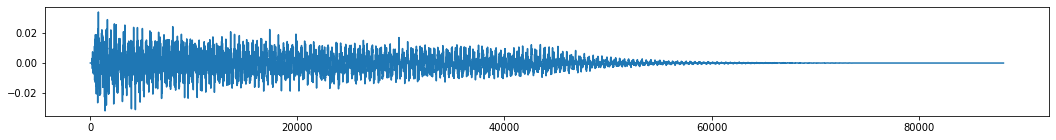

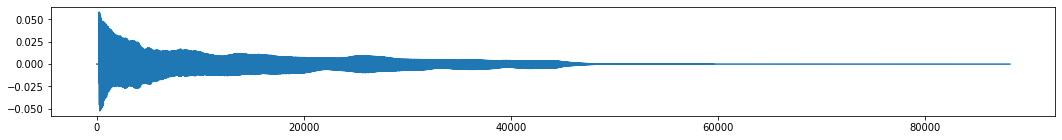

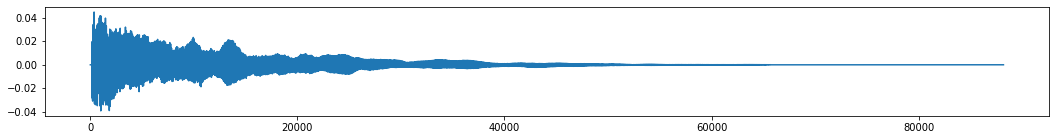

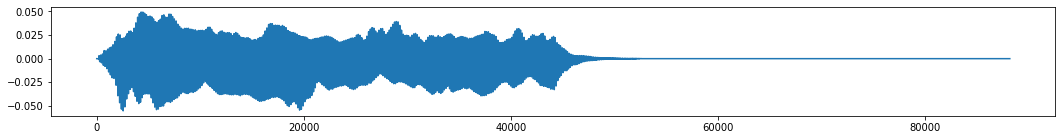

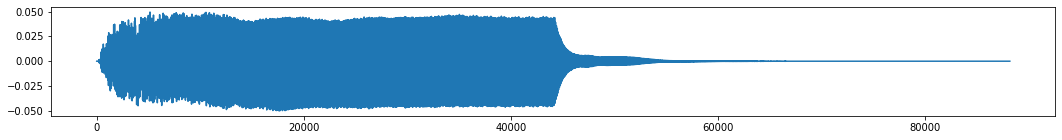

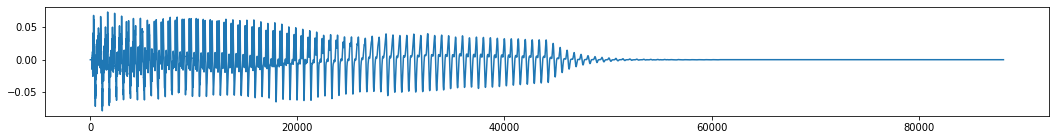

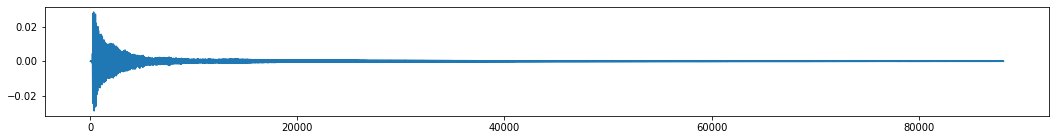

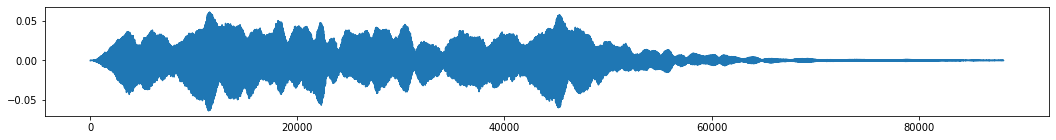

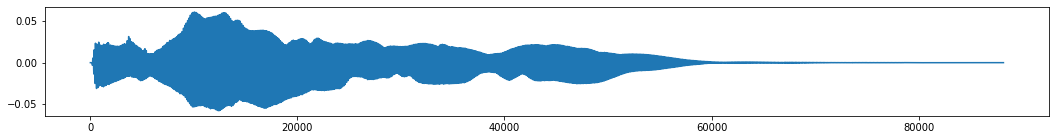

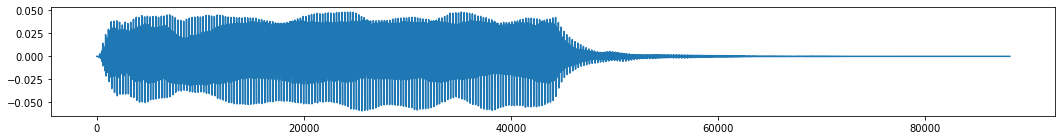

In [ ]:
for idx in range(0, len(audio_np), num_notes):
  plt.figure(figsize = (18,2))
  plt.plot(audio_np[idx])
  plt.ylim,((-0.05, 0.05))
  plt.show()

In [ ]:
print(f'{inst_np[0]}번 악기')
ipd.Audio(audio_np[0], rate = sr)

0번 악기


In [ ]:
print(f'{inst_np[50]}번 악기')
ipd.Audio(audio_np[50], rate = sr)

1번 악기


In [ ]:
print(f'{inst_np[100]}번 악기')
ipd.Audio(audio_np[100], rate = sr)

2번 악기


In [ ]:
print(f'{inst_np[150]}번 악기')
ipd.Audio(audio_np[150], rate = sr)

3번 악기


In [ ]:
print(f'{inst_np[200]}번 악기')
ipd.Audio(audio_np[200], rate = sr)

4번 악기


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size = 0.2)

print(f'학습 데이터 셋 크기 : {train_x.shape}, 학습 데이터 라벨 크기 : {train_y.shape}')
print(f'테스트 데이터 셋 크기 : {test_x.shape}, 테스트 데이터 라벨 크기 : {test_y.shape}')

학습 데이터 셋 크기 : (400, 88200), 학습 데이터 라벨 크기 : (400,)
테스트 데이터 셋 크기 : (100, 88200), 테스트 데이터 라벨 크기 : (100,)


### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(train_x, train_y)
pred = lr.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.04


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC()
svm.fit(train_x, train_y)
pred = svm.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.17


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
pred = dt.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.38


## Constant-Q를 이용한 머신러닝 오디오 분류

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

*   주파수 대역을 저장할 리스트 `audio_cqt` 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



In [ ]:
audio_cqt = []
for y in audio :
  ret = librosa.cqt(y, sr, hop_length = 1024, n_bins = 24*7, bins_per_octave=24)
  ret = np.abs(ret)3

  audio_cqt.append(ret)

In [ ]:
sr

44100

* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

/usr/local/lib/python3.7/dist-packages/librosa/display.py:1336: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


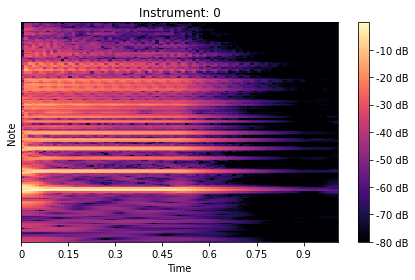

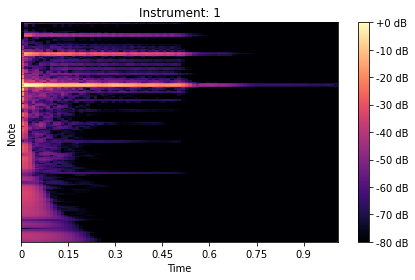

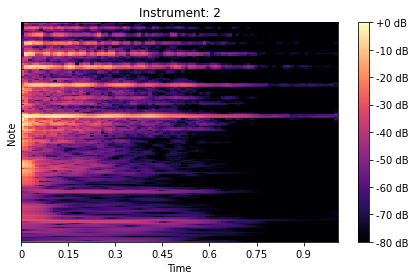

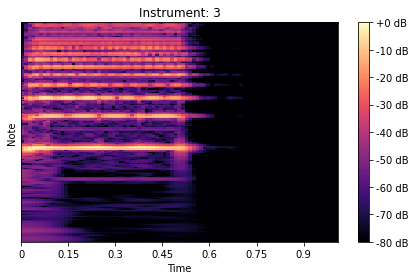

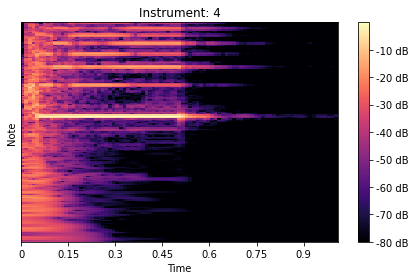

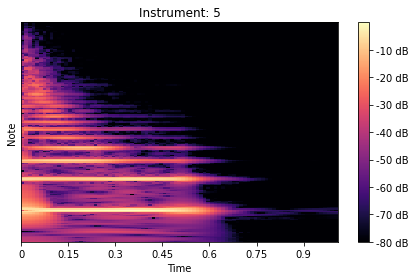

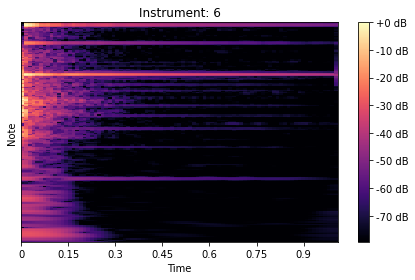

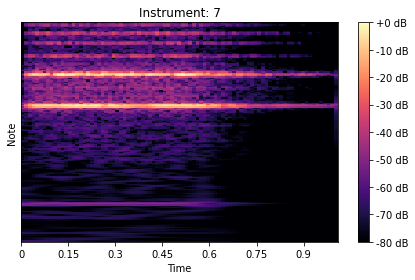

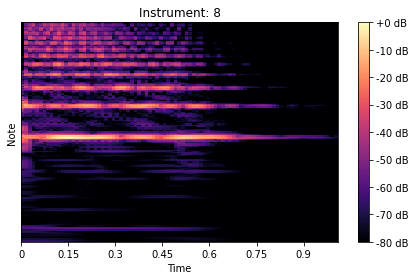

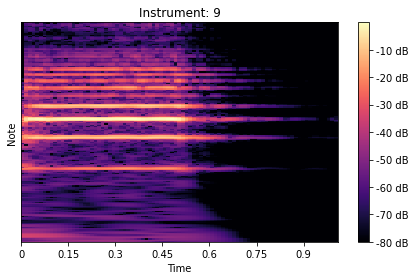

In [ ]:
for i in range(0, len(instruments) * num_notes, num_notes):
  amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref = np.max)
  librosa.display.specshow(amp_db, sr = sr, x_axis = 'time', y_axis = 'cqt_note')
  plt.colorbar(format = '%+2.0f dB')
  plt.title(f'Instrument: {inst[i]}')
  plt.tight_layout()
  plt.show()

* 훈련 데이터와 실험 데이터를 분리

In [ ]:
cqt_np = np.array(audio_cqt, np.float32)
inst_np = np.array(inst, np.int16)

print(cqt_np.shape, inst_np.shape)

(500, 168, 87) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
cqt_np = cqt_np.reshape(500, 168*87)

print(cqt_np.shape, inst_np.shape)

(500, 14616) (500,)




*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cqt_np, inst_np, test_size = 0.2)

print(f'학습 데이터 셋 크기 : {train_x.shape}, 학습 데이터 라벨 크기 : {train_y.shape}')
print(f'테스트 데이터 셋 크기 : {test_x.shape}, 테스트 데이터 라벨 크기 : {test_y.shape}')

학습 데이터 셋 크기 : (400, 14616), 학습 데이터 라벨 크기 : (400,)
테스트 데이터 셋 크기 : (100, 14616), 테스트 데이터 라벨 크기 : (100,)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(train_x, train_y)
pred = lr.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.34


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC()
svm.fit(train_x, train_y)
pred = svm.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.3


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
pred = dt.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.62


## Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
from tensorflow.keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_np = cqt_np.reshape(500, 168 * 87)
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size = 0.2)

print(f'학습 데이터 셋 크기 : {train_x.shape}, 학습 데이터 라벨 크기 : {train_y.shape}')
print(f'테스트 데이터 셋 크기 : {test_x.shape}, 테스트 데이터 라벨 크기 : {test_y.shape}')

학습 데이터 셋 크기 : (400, 14616, 1), 학습 데이터 라벨 크기 : (400, 10)
테스트 데이터 셋 크기 : (100, 14616, 1), 테스트 데이터 라벨 크기 : (100, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (14616,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7483904   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7,649,418
Trainable params: 7,649,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs = 30,
                    validation_data = (test_x, test_y))

Epoch 1/30
13/13 [==============================] - 4s 29ms/step - loss: 2.0618 - acc: 0.2475 - val_loss: 1.9866 - val_acc: 0.2400
Epoch 2/30
13/13 [==============================] - 0s 11ms/step - loss: 1.3768 - acc: 0.4850 - val_loss: 1.8346 - val_acc: 0.1900
Epoch 3/30
13/13 [==============================] - 0s 12ms/step - loss: 0.9508 - acc: 0.6825 - val_loss: 1.8936 - val_acc: 0.2100
Epoch 4/30
13/13 [==============================] - 0s 12ms/step - loss: 0.6650 - acc: 0.7550 - val_loss: 2.1268 - val_acc: 0.3300
Epoch 5/30
13/13 [==============================] - 0s 11ms/step - loss: 0.4940 - acc: 0.8475 - val_loss: 1.8264 - val_acc: 0.4600
Epoch 6/30
13/13 [==============================] - 0s 12ms/step - loss: 0.3459 - acc: 0.9325 - val_loss: 1.9905 - val_acc: 0.4000
Epoch 7/30
13/13 [==============================] - 0s 11ms/step - loss: 0.2480 - acc: 0.9425 - val_loss: 2.2003 - val_acc: 0.4500
Epoch 8/30
13/13 [==============================] - 0s 11ms/step - loss: 0.1801 - a

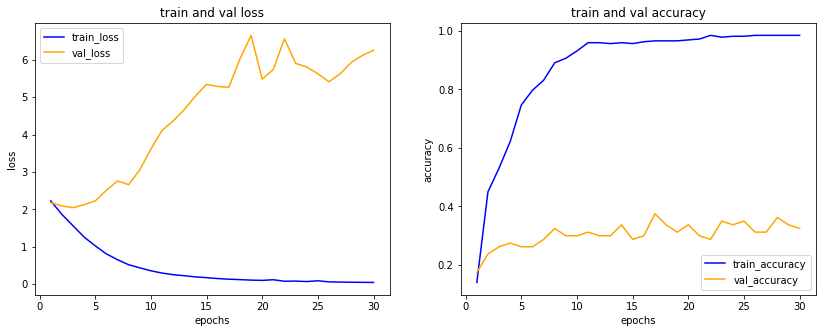

4/4 [==============================] - 0s 6ms/step - loss: 5.7925 - acc: 0.3900


[5.792479991912842, 0.38999998569488525]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
from tensorflow.keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size = 0.2)

print(f'학습 데이터 셋 크기 : {train_x.shape}, 학습 데이터 라벨 크기 : {train_y.shape}')
print(f'테스트 데이터 셋 크기 : {test_x.shape}, 테스트 데이터 라벨 크기 : {test_y.shape}')

학습 데이터 셋 크기 : (400, 168, 87, 1), 학습 데이터 라벨 크기 : (400, 10)
테스트 데이터 셋 크기 : (100, 168, 87, 1), 테스트 데이터 라벨 크기 : (100, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu',input_shape = (168,87,1)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(train_x, train_y, epochs = 30, batch_size = 128, validation_split = 0.2)

Epoch 1/30
3/3 [==============================] - 24s 3s/step - loss: 2.2333 - acc: 0.1187 - val_loss: 2.3855 - val_acc: 0.2125
Epoch 2/30
3/3 [==============================] - 2s 600ms/step - loss: 1.8781 - acc: 0.2875 - val_loss: 1.7385 - val_acc: 0.3250
Epoch 3/30
3/3 [==============================] - 2s 598ms/step - loss: 1.3970 - acc: 0.5156 - val_loss: 1.9087 - val_acc: 0.4250
Epoch 4/30
3/3 [==============================] - 2s 603ms/step - loss: 0.9018 - acc: 0.6438 - val_loss: 2.8260 - val_acc: 0.5625
Epoch 5/30
3/3 [==============================] - 2s 601ms/step - loss: 0.8868 - acc: 0.7125 - val_loss: 2.3488 - val_acc: 0.5750
Epoch 6/30
3/3 [==============================] - 2s 671ms/step - loss: 0.6343 - acc: 0.8156 - val_loss: 2.0006 - val_acc: 0.6000
Epoch 7/30
3/3 [==============================] - 2s 600ms/step - loss: 0.4545 - acc: 0.8656 - val_loss: 1.6667 - val_acc: 0.8125
Epoch 8/30
3/3 [==============================] - 2s 601ms/step - loss: 0.3200 - acc: 0.9375

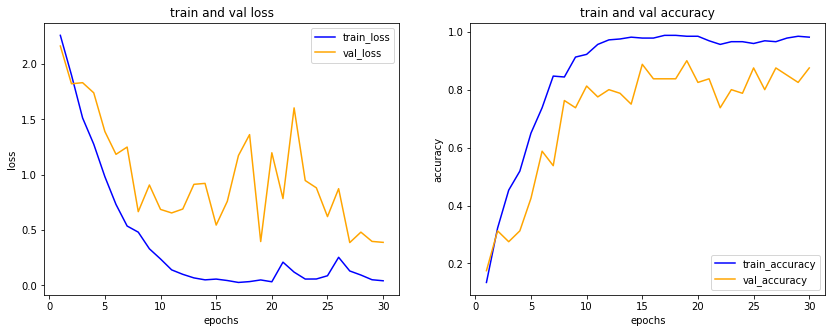



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 1s 116ms/step - loss: 1.3473 - acc: 0.8800


[1.3473420143127441, 0.8799999952316284]

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [ ]:
audio_mfcc = []

for y in audio :
  ret = librosa.feature.mfcc(y = y, sr = sr)
  audio_mfcc.append(ret)

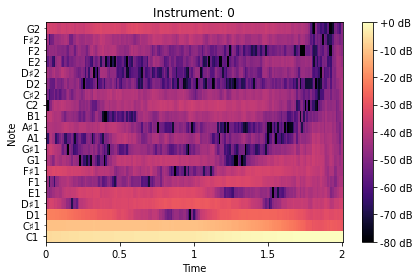

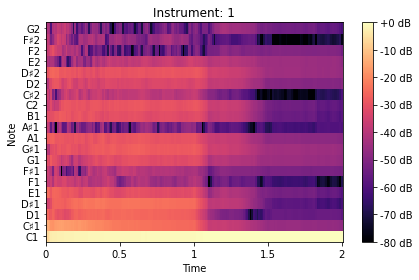

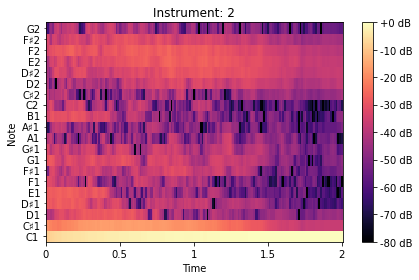

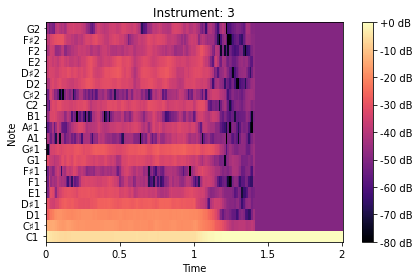

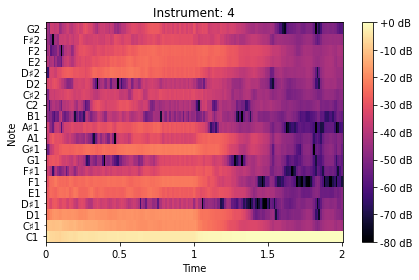

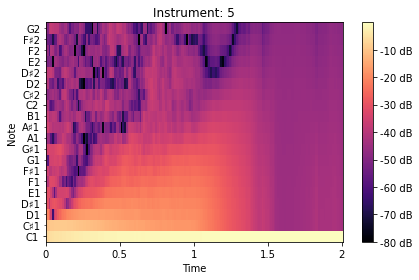

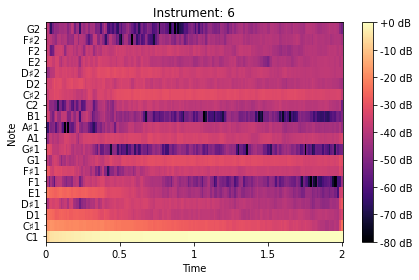

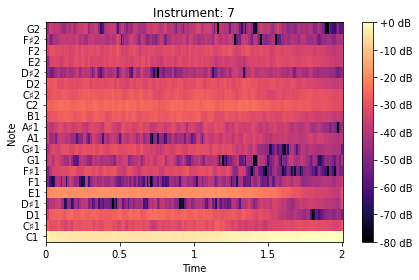

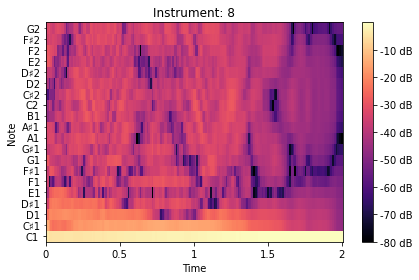

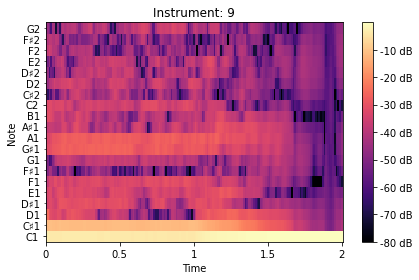

In [ ]:
for i in range(0, len(instruments) * num_notes, num_notes):
  amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]), ref = np.max)
  librosa.display.specshow(amp_db, sr = sr, x_axis = 'time', y_axis = 'cqt_note')
  plt.colorbar(format = '%+2.0f dB')
  plt.title(f'Instrument: {inst[i]}')
  plt.tight_layout()
  plt.show()

In [ ]:
mfcc_np = np.array(audio_mfcc, np.float32)
inst_np = np.array(inst, np.int16)

print(mfcc_np.shape, inst_np.shape)

(500, 20, 173) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
mfcc_np = mfcc_np.reshape(500, 20 * 173)

print(mfcc_np.shape, inst_np.shape)

(500, 3460) (500,)




*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(mfcc_np, inst_np, test_size = 0.2)

print(f'학습 데이터 셋 크기 : {train_x.shape}, 학습 데이터 라벨 크기 : {train_y.shape}')
print(f'테스트 데이터 셋 크기 : {test_x.shape}, 테스트 데이터 라벨 크기 : {test_y.shape}')

학습 데이터 셋 크기 : (400, 3460), 학습 데이터 라벨 크기 : (400,)
테스트 데이터 셋 크기 : (100, 3460), 테스트 데이터 라벨 크기 : (100,)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(train_x, train_y)
pred = lr.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.96


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svm = svm.LinearSVC()
svm.fit(train_x, train_y)
pred = svm.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.97


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
pred = dt.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.85


## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

학습 데이터 셋 크기: (400, 3460, 1), 학습 데이터 라벨 크기(400, 10)
테스트 데이터 셋 크기: (100, 3460, 1), 테스트 데이터 라벨 크기(100, 10)


In [ ]:
from tensorflow.keras.utils import to_categorical

mfcct_np = np.array(audio_mfcc, np.float32)
mfcc_np = mfcc_np.reshape(500, 20*173)
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size = 0.2)

print(f'학습 데이터 셋 크기 : {train_x.shape}, 학습 데이터 라벨 크기 : {train_y.shape}')
print(f'테스트 데이터 셋 크기 : {test_x.shape}, 테스트 데이터 라벨 크기 : {test_y.shape}')

학습 데이터 셋 크기 : (400, 3460, 1), 학습 데이터 라벨 크기 : (400, 10)
테스트 데이터 셋 크기 : (100, 3460, 1), 테스트 데이터 라벨 크기 : (100, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (3460,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(train_x, train_y, epochs = 30, batch_size = 128, validation_split = 0.2)

Epoch 1/30
3/3 [==============================] - 1s 181ms/step - loss: 202.4646 - acc: 0.1281 - val_loss: 300.5137 - val_acc: 0.0875
Epoch 2/30
3/3 [==============================] - 0s 26ms/step - loss: 328.9483 - acc: 0.1063 - val_loss: 294.1904 - val_acc: 0.1625
Epoch 3/30
3/3 [==============================] - 0s 25ms/step - loss: 226.5795 - acc: 0.1437 - val_loss: 143.0690 - val_acc: 0.1250
Epoch 4/30
3/3 [==============================] - 0s 30ms/step - loss: 100.5767 - acc: 0.2562 - val_loss: 65.7444 - val_acc: 0.2250
Epoch 5/30
3/3 [==============================] - 0s 26ms/step - loss: 56.0450 - acc: 0.2188 - val_loss: 51.2502 - val_acc: 0.2500
Epoch 6/30
3/3 [==============================] - 0s 26ms/step - loss: 41.6945 - acc: 0.3094 - val_loss: 30.5924 - val_acc: 0.3125
Epoch 7/30
3/3 [==============================] - 0s 25ms/step - loss: 25.8739 - acc: 0.4375 - val_loss: 28.3418 - val_acc: 0.3375
Epoch 8/30
3/3 [==============================] - 0s 29ms/step - loss: 17.7

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 5ms/step - loss: 3.8845 - acc: 0.8300


[3.884483575820923, 0.8299999833106995]

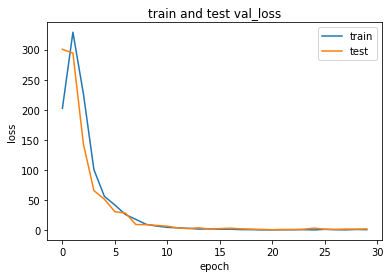

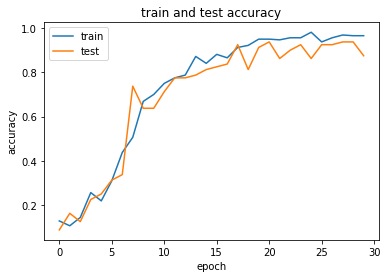

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train and test val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('train and test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
from tensorflow.keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_array = np.expand_dims(mfcc_np, -1)

inst_np = np.array(inst, np.int16)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size = 0.2)

print(f'학습 데이터 셋 크기 : {train_x.shape}, 학습 데이터 라벨 크기 : {train_y.shape}')
print(f'테스트 데이터 셋 크기 : {test_x.shape}, 테스트 데이터 라벨 크기 : {test_y.shape}')

학습 데이터 셋 크기 : (400, 20, 173, 1), 학습 데이터 라벨 크기 : (400, 10)
테스트 데이터 셋 크기 : (100, 20, 173, 1), 테스트 데이터 라벨 크기 : (100, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu',input_shape = (20,173 ,1)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(train_x, train_y, epochs = 30, batch_size = 128, validation_split = 0.2)

Epoch 1/30
3/3 [==============================] - 4s 909ms/step - loss: 83.7835 - acc: 0.0938 - val_loss: 21.5363 - val_acc: 0.1125
Epoch 2/30
3/3 [==============================] - 1s 183ms/step - loss: 16.0562 - acc: 0.1031 - val_loss: 3.5235 - val_acc: 0.1375
Epoch 3/30
3/3 [==============================] - 1s 184ms/step - loss: 2.8823 - acc: 0.1187 - val_loss: 2.2823 - val_acc: 0.1250
Epoch 4/30
3/3 [==============================] - 1s 177ms/step - loss: 2.1638 - acc: 0.2062 - val_loss: 2.0773 - val_acc: 0.1875
Epoch 5/30
3/3 [==============================] - 1s 179ms/step - loss: 1.8878 - acc: 0.3594 - val_loss: 1.7350 - val_acc: 0.3375
Epoch 6/30
3/3 [==============================] - 1s 177ms/step - loss: 1.5877 - acc: 0.4125 - val_loss: 1.6950 - val_acc: 0.3875
Epoch 7/30
3/3 [==============================] - 1s 179ms/step - loss: 1.3206 - acc: 0.4938 - val_loss: 0.9414 - val_acc: 0.5875
Epoch 8/30
3/3 [==============================] - 1s 177ms/step - loss: 0.9752 - acc: 0

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 59ms/step - loss: 0.0403 - acc: 0.9700


[0.04030069708824158, 0.9700000286102295]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 20, 173, 128)      1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 87, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 87, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 44, 256)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 44, 512)        1180160   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 22, 512)      

# RNN, LSTM